In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 500
pd.set_option('max_colwidth',40)

In [3]:
import graphviz
import pydotplus
import io
from scipy import misc

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Load data frame

In [5]:
os.chdir(r'C:\Users\Sellit\Desktop\BA_Coding\Data\1final_out')

In [6]:
start4=datetime.now()

df= pd.read_hdf('df_analysis_per_cat.h5', 'df')

end4 = datetime.now()
print(end4 - start4)

0:00:00.503723


### Decision Tree Classifier

In [9]:
y = df['purchase']
X = df.drop('purchase', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

#### all columns

In [122]:
c = DecisionTreeClassifier(min_samples_split=15)

In [123]:
start4=datetime.now()

dt = c.fit(X_train, y_train)

end4 = datetime.now()
print(end4 - start4)

0:00:00.286848


##### Test set

In [124]:
c.score(X_test, y_test)

0.7719082719082719

In [125]:
y_pred = c.predict(X_test)

In [126]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1732  282]
 [ 275  153]]
             precision    recall  f1-score   support

      False       0.86      0.86      0.86      2014
       True       0.35      0.36      0.35       428

avg / total       0.77      0.77      0.77      2442



In [127]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in c.predict_proba(X_test)]
auc = roc_auc_score(y_test, y_hat)

print(auc)

0.6436857882671765


In [128]:
importances = c.feature_importances_ 

In [129]:
col = (X_train.columns)

In [130]:
pd.DataFrame({'Feature':col, 'Importances':importances})

,Feature,Importances
0,dist_on_page_cat1,0.004942
1,dist_on_page_cat2,0.020204
2,dist_on_page_cat3,0.006801
3,dist_on_page_home,0.006281
4,dist_on_page_info,0.002264
5,dist_on_page_marken,0.000000
6,dist_on_page_product,0.025555
7,dist_on_page_search,0.002756
8,entry_page_cat_account,0.000000
9,entry_page_cat_cat1,0.002468


##### Training set

In [131]:
c.score(X_train, y_train)

0.9450588028787081

In [132]:
y_pred = c.predict(X_train)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[4578  114]
 [ 199  806]]
             precision    recall  f1-score   support

      False       0.96      0.98      0.97      4692
       True       0.88      0.80      0.84      1005

avg / total       0.94      0.95      0.94      5697



In [134]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in c.predict_proba(X_train)]
auc = roc_auc_score(y_train, y_hat)

print(auc)

0.9861440877454162


### XGBoost

#### Without weights

In [135]:
import xgboost as xgb

xclf = xgb.XGBClassifier( objective = 'binary:logistic')

xclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

##### Test set

In [136]:
xclf.score(X_test, y_test)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8419328419328419

In [137]:
y_pred = xclf.predict(X_test)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1934   80]
 [ 306  122]]
             precision    recall  f1-score   support

      False       0.86      0.96      0.91      2014
       True       0.60      0.29      0.39       428

avg / total       0.82      0.84      0.82      2442



In [139]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in xclf.predict_proba(X_test)]
auc = roc_auc_score(y_test, y_hat)

print(auc)

0.802649560552766


In [140]:
scores = xclf.feature_importances_ 

In [141]:
col = (X_train.columns)

In [142]:
pd.DataFrame({'Variable':col, 'Importance':scores}).sort_values(by=['Importance'], ascending = False)

,Variable,Importance
63,ta_area_map_In den Warenkorb_time_on...,0.080717
75,ta_area_map_ProductDetails_Right_tim...,0.041854
87,ta_area_map_ThumbArea_time_on_oject_...,0.040359
71,ta_area_map_Picture_main_time_on_oje...,0.038864
31,mean_velocity_product,0.037369
49,ta_area_map_Advisor_time_on_oject_ag...,0.032885
104,time_no_movement_product,0.032885
77,ta_area_map_ProductHeader_time_on_oj...,0.028401
53,ta_area_map_AreaCalculation_time_on_...,0.025411
109,visitTime_home,0.025411


##### Training set

In [143]:
xclf.score(X_train, y_train)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8711602597858522

In [144]:
y_pred = xclf.predict(X_train)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[4614   78]
 [ 656  349]]
             precision    recall  f1-score   support

      False       0.88      0.98      0.93      4692
       True       0.82      0.35      0.49      1005

avg / total       0.87      0.87      0.85      5697



In [146]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in xclf.predict_proba(X_train)]
auc = roc_auc_score(y_train, y_hat)

print(auc)

0.871991279747893


#### With Weights

In [178]:
import xgboost as xgb

xclf = xgb.XGBClassifier( scale_pos_weight = 3.0, objective = 'binary:logistic')

xclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0, seed=None,
       silent=True, subsample=1)

##### Test set

In [179]:
xclf.score(X_test, y_test)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8112203112203112

In [180]:
y_pred = xclf.predict(X_test)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [181]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1737  277]
 [ 184  244]]
             precision    recall  f1-score   support

      False       0.90      0.86      0.88      2014
       True       0.47      0.57      0.51       428

avg / total       0.83      0.81      0.82      2442



In [182]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in xclf.predict_proba(X_test)]
auc = roc_auc_score(y_test, y_hat)

print(auc)

0.8033543234739997


In [152]:
scores = xclf.feature_importances_ 

In [153]:
col = (X_train.columns)

In [159]:
feature_importance = pd.DataFrame({'Variable':col, 'Importance':scores}).sort_values(by=['Importance'], ascending = False)

In [160]:
feature_importance

,Variable,Importance
63,ta_area_map_In den Warenkorb_time_on...,0.074242
75,ta_area_map_ProductDetails_Right_tim...,0.048485
71,ta_area_map_Picture_main_time_on_oje...,0.039394
87,ta_area_map_ThumbArea_time_on_oject_...,0.039394
31,mean_velocity_product,0.037879
49,ta_area_map_Advisor_time_on_oject_ag...,0.031818
77,ta_area_map_ProductHeader_time_on_oj...,0.027273
79,ta_area_map_Products_time_on_oject_a...,0.027273
3,dist_on_page_home,0.024242
23,max_y_product,0.024242


In [162]:
os.chdir(r'C:\Users\Sellit\Desktop\BA_Coding\Data\1final_out') 
writer = pd.ExcelWriter('feature_importance.xlsx') 
feature_importance.to_excel(writer,'Sheet1')

##### Training set

In [155]:
xclf.score(X_train, y_train)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8569422503071792

In [156]:
y_pred = xclf.predict(X_train)

C:\Users\Sellit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[4234  458]
 [ 357  648]]
             precision    recall  f1-score   support

      False       0.92      0.90      0.91      4692
       True       0.59      0.64      0.61      1005

avg / total       0.86      0.86      0.86      5697



In [158]:
from sklearn.metrics import roc_auc_score

y_hat = [x[1] for x in xclf.predict_proba(X_train)]
auc = roc_auc_score(y_train, y_hat)

print(auc)

0.8794979705055286


### Show decision tree

In [17]:
def _show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [18]:
features = list(X_train.columns)

C:\Users\Sellit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\Sellit\Anaconda3\lib\site-packages\PIL\Image.py:2514: DecompressionBombWarning: Image size (106691060 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


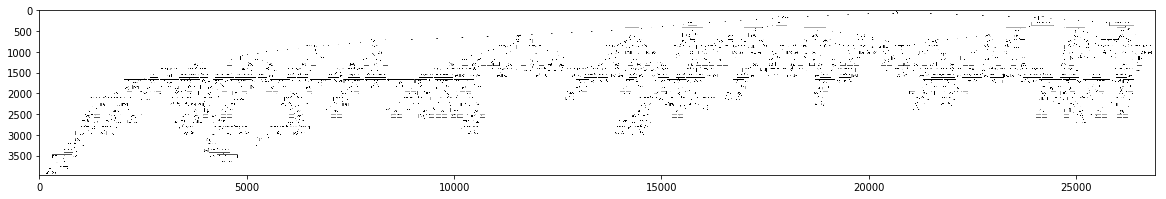

In [21]:
_show_tree(dt, features, 'dec_tree_01.png')